In [135]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime


In [145]:
data = pd.read_csv(r"C:\Users\Bhargava\Downloads\Ration.csv")

In [146]:
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [147]:
data.head()

,Sl No.,Mandal,Nov-2017,Dec_2017,Jan_2018,Feb_2018,Mar_2018,Apr_2018,May_2018,June_2018,July_2018,Aug_2018,Sep_2018,Oct_2018,Nov_2018,Dec_2018,Jan_2019,Feb_2019
0,1,Koilkuntla,86.43,87.76,90.70,90.14,91.09,91.59,90.37,91.23,91.74,91.17,91.07,90.56,91.39,91.93,93.07,93.06
1,2,Maddikera East,85.92,86.47,90.01,88.19,87.97,88.95,88.68,88.23,88.60,89.05,87.97,90.28,89.58,89.63,91.18,91.29
2,3,Allagadda,84.05,84.47,87.92,86.79,87.02,87.10,85.42,87.42,87.18,88.67,87.56,88.08,88.91,89.93,91.05,89.99
3,4,Kolimingundla,87.11,87.96,89.90,89.60,88.31,89.36,88.08,89.00,89.34,89.35,88.87,89.24,88.75,89.27,90.88,89.89
4,5,Kallur,84.50,84.82,87.07,87.81,87.09,87.25,86.75,87.72,87.51,88.03,86.47,88.61,88.69,88.62,90.10,88.72


In [149]:
a1 = datetime.datetime(2017,11,1)
a2 = datetime.datetime(2017,12,1)
a3 = datetime.datetime(2018,1,1)
a4 = datetime.datetime(2018,2,1)
a5 = datetime.datetime(2018,3,1)
a6 = datetime.datetime(2018,4,1)
a7 = datetime.datetime(2018,5,1)
a8 = datetime.datetime(2018,6,1)
a9 = datetime.datetime(2018,7,1)
a10 = datetime.datetime(2018,8,1)
a11 = datetime.datetime(2018,9,1)
a12 = datetime.datetime(2018,10,1)
a13 = datetime.datetime(2018,11,1)
a14 = datetime.datetime(2018,12,1)
a15 = datetime.datetime(2019,1,1)
a16 = datetime.datetime(2019,2,1)


In [156]:
#data = data.drop(['Sl No.'],axis=1)
data.columns = ['Sl No.','Mandal',a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]

In [157]:
data1 = data.transpose()
#data1.drop(['Sl No.'],axis=1)
data1.head()

,1970-01-01 00:00:00,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000007,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000009,...,1970-01-01 00:00:00.000000045,1970-01-01 00:00:00.000000046,1970-01-01 00:00:00.000000047,1970-01-01 00:00:00.000000048,1970-01-01 00:00:00.000000049,1970-01-01 00:00:00.000000050,1970-01-01 00:00:00.000000051,1970-01-01 00:00:00.000000052,1970-01-01 00:00:00.000000053,1970-01-01 00:00:00.000000054
Sl No.,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,55
Mandal,Koilkuntla,Maddikera East,Allagadda,Kolimingundla,Kallur,Dhone,Banaganapalle,Bethamcherla,Chagalamarri,Owk,...,Holagunda,Kosigi,Peddakadubur,Jupadu Bungalow,Mantralayam,Srisailam,Nandavaram,Pagidyala,Kowthalam,Adoni
2017-11-01 00:00:00,86.43,85.92,84.05,87.11,84.5,84.56,84.56,86.48,84.29,85.64,...,77.68,78.51,83.09,77.88,81.79,67.34,81.14,76.04,79.86,75.54
2017-12-01 00:00:00,87.76,86.47,84.47,87.96,84.82,84.77,85.76,87.21,84.57,85.82,...,79.38,77.47,80.88,79.56,80.62,71.75,80.91,78.91,80.12,75.41
2018-01-01 00:00:00,90.7,90.01,87.92,89.9,87.07,87.02,88.21,88.54,87.2,88.42,...,81.97,78.88,83.43,84.05,85.18,74.52,85.42,82.57,81.77,79.04


In [82]:
def fun(x):
    if(x=='Jan_2018'):
        return '2018-01'
    if(x=='Feb_2018'):
        return '2018-02'
    if(x=='Mar_2018'):
        return '2018-03'
    if(x=='Apr_2018'):
        return '2018-04'
    if(x=='May_2018'):
        return '2018-05'
    if(x=='Jun_2018'):
        return '2018-06'
    if(x=='Jul_2018'):
        return '2018-07'
    if(x=='Jul_2018'):
        return '2018-08'
    if(x=='Sep_2018'):
        return '2018-09'
    if(x=='Oct_2018'):
        return '2018-10'
    if(x=='Nov_2018'):
        return '2018-11'
    if(x=='Dec_2018'):
        return '2018-12'
    if(x=='Jan_2019'):
        return '2019-01'
    if(x=='Feb_2019'):
        return '2019-02'
    if(x=='Nov_2017'):
        return '2017-11'
    if(x=='Dec_2017'):
        return '2017-12'

In [158]:
y1 = data1[1].copy()
y1 = y1.drop(['Mandal'])
data.index = pd.to_datetime(data.index)
y1_index = data.index.to_period('M')
#ts= ts['Mandal'].map(fun)
ts = data1[1]



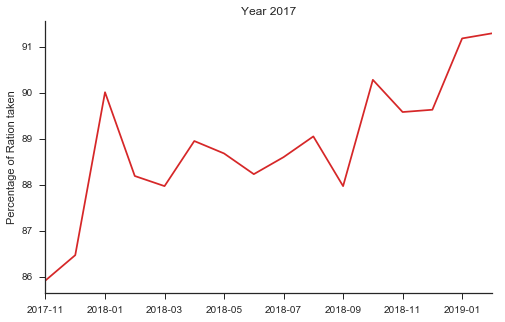

In [107]:
fig, ax= plt.subplots(figsize=(8,5))
y1.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Ration taken')
ax.set_title('Year 2017')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

In [163]:
ts = ts.drop(['Sl No.'])
ts.head()

Mandal                 Maddikera East
2017-11-01 00:00:00             85.92
2017-12-01 00:00:00             86.47
2018-01-01 00:00:00             90.01
2018-02-01 00:00:00             88.19
Name: 1970-01-01 00:00:00.000000001, dtype: object

In [160]:
decomposition = sm.tsa.x13_arima_analysis(ts)

ValueError: Unknown string format

In [99]:
import forecast
holt = forecast.holt(y1)
holt.fit()
holt.summary()

AttributeError: module 'forecast' has no attribute 'holt'

In [100]:

ahw=forecast.holtwinters(y1, additive=True, damped=False, m=12)
ahw.fit()
ahw.summary()

AttributeError: module 'forecast' has no attribute 'holtwinters'